In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# linear algebra
import numpy as np 
# Visualizations
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
%matplotlib inline
# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

In [3]:
ROOT = r"./"
DATA_IN = os.path.join(ROOT, "datasets")
data_2020 = os.path.join(DATA_IN, "IT_Salary_Survey_EU_2020.csv")
data_2019 = os.path.join(DATA_IN, "IT_Salary_Survey_EU_2019.csv")
data_2018 = os.path.join(DATA_IN, "IT_Salary_Survey_EU_2018.csv")

LABEL_COL='>50K'

print(data_2020)
print(data_2019)
print(data_2018)

./datasets\IT_Salary_Survey_EU_2020.csv
./datasets\IT_Salary_Survey_EU_2019.csv
./datasets\IT_Salary_Survey_EU_2018.csv


In [4]:
df_2020 = pd.read_csv(data_2020)
df_2019 = pd.read_csv(data_2019)
df_2018 = pd.read_csv(data_2018)
df_2020.head()

,Timestamp,Age,Gender,City,Position,Total years of experience,Years of experience in Germany,Seniority level,Your main technology / programming language,Other technologies/programming languages you use often,...,Annual bonus+stocks one year ago. Only answer if staying in same country,Number of vacation days,Employment status,Сontract duration,Main language at work,Company size,Company type,Have you lost your job due to the coronavirus outbreak?,"Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week","Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR"
0,24/11/2020 11:14:15,26.0,Male,Munich,Software Engineer,5,3,Senior,TypeScript,"Kotlin, Javascript / Typescript",...,10000,30,Full-time employee,Unlimited contract,English,51-100,Product,No,NaN,NaN
1,24/11/2020 11:14:16,26.0,Male,Berlin,Backend Developer,7,4,Senior,Ruby,NaN,...,5000,28,Full-time employee,Unlimited contract,English,101-1000,Product,No,NaN,NaN
2,24/11/2020 11:14:21,29.0,Male,Berlin,Software Engineer,12,6,Lead,Javascript / Typescript,"Javascript / Typescript, Docker",...,100000,30,Self-employed (freelancer),Temporary contract,English,101-1000,Product,Yes,NaN,NaN
3,24/11/2020 11:15:24,28.0,Male,Berlin,Frontend Developer,4,1,Junior,Javascript,NaN,...,NaN,24,Full-time employee,Unlimited contract,English,51-100,Startup,No,NaN,NaN
4,24/11/2020 11:15:46,37.0,Male,Berlin,Backend Developer,17,6,Senior,C# .NET,".NET, SQL, AWS, Docker",...,NaN,29,Full-time employee,Unlimited contract,English,101-1000,Product,No,NaN,NaN


In [3]:
row_count = df_2020.shape[0]
print("Number of rows:", row_count)

Number of rows: 1253


In [4]:
df_2020.tail(5)

,Timestamp,Age,Gender,City,Position,Total years of experience,Years of experience in Germany,Seniority level,Your main technology / programming language,Other technologies/programming languages you use often,...,Annual bonus+stocks one year ago. Only answer if staying in same country,Number of vacation days,Employment status,Сontract duration,Main language at work,Company size,Company type,Have you lost your job due to the coronavirus outbreak?,"Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week","Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR"
1248,18/01/2021 15:05:50,31.0,Male,Berlin,Backend Developer,9,5,Senior,Java,"Python, Javascript / Typescript, Java / Scala,...",...,72000,26,Full-time employee,Unlimited contract,English,51-100,Product,Yes,NaN,NaN
1249,18/01/2021 17:46:02,33.0,Male,Berlin,Researcher/ Consumer Insights Analyst,10,1.5,Senior,consumer analysis,NaN,...,2500,unlimited,Full-time employee,Unlimited contract,English,1000+,Product,No,NaN,0
1250,18/01/2021 23:20:35,39.0,Male,Munich,IT Operations Manager,15,2,Lead,PHP,"Python, C/C++, Javascript / Typescript, Java /...",...,NaN,28,Full-time employee,Unlimited contract,English,101-1000,eCommerce,No,NaN,NaN
1251,19/01/2021 10:17:58,26.0,Male,Saarbrücken,Frontend Developer,7,7,Middle,JavaScript,"Javascript / Typescript, Docker, HTML, CSS; Ad...",...,36400,27,Full-time employee,Unlimited contract,German,101-1000,Product,No,NaN,0
1252,19/01/2021 12:01:11,26.0,Male,Berlin,DevOps,2,2,Middle,yaml,"Python, AWS, Kubernetes, Docker, terraform, an...",...,0,30,Full-time employee,Unlimited contract,English,51-100,Startup,No,30.0,600


In [5]:
df = df_2020.copy()
df.shape

(1253, 23)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1253 entries, 0 to 1252
Data columns (total 23 columns):
 #   Column                                                                                                                   Non-Null Count  Dtype  
---  ------                                                                                                                   --------------  -----  
 0   Timestamp                                                                                                                1253 non-null   object 
 1   Age                                                                                                                      1226 non-null   float64
 2   Gender                                                                                                                   1243 non-null   object 
 3   City                                                                                                                     1253 non-null   o

In [7]:
df.columns

Index(['Timestamp', 'Age', 'Gender', 'City', 'Position ',
       'Total years of experience', 'Years of experience in Germany',
       'Seniority level', 'Your main technology / programming language',
       'Other technologies/programming languages you use often',
       'Yearly brutto salary (without bonus and stocks) in EUR',
       'Yearly bonus + stocks in EUR',
       'Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country',
       'Annual bonus+stocks one year ago. Only answer if staying in same country',
       'Number of vacation days', 'Employment status', 'Сontract duration',
       'Main language at work', 'Company size', 'Company type',
       'Have you lost your job due to the coronavirus outbreak?',
       'Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week',
       'Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 20

In [8]:
questions_columns_schema = {
    'Timestamp':'Timestamp',
    'Age':'Age',
    'Gender':'Gender',
    'City':'City',
    'Position':'Position',
    'Total years of experience':'Experience_Y',
    'Years of experience in Germany':'Experience_Germany_Y',
    'Seniority level':'Seniority',
    'Your main technology / programming language':'Primary_Technology',
    'Other technologies/programming languages you use often':'Secondary_Technologies',
    'Yearly brutto salary (without bonus and stocks) in EUR':'Bruto_Salary',
    'Yearly bonus + stocks in EUR':'Bonus',
    'Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country':'Bruto_Salary_Last_Year',
    'Annual bonus+stocks one year ago. Only answer if staying in same country':'Bonus_Last_Year',
    'Number of vacation days':'Vacation',
    'Employment status':'Employment_Status',
    'Сontract duration':'Contract_Duration',
    'Main language at work':'Language',
    'Company size':'Company_Size',
    'Company type':'Company_Type',
    'Have you lost your job due to the coronavirus outbreak?':'Lost_Job',
    'Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week':'Shorter_Week',
    'Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR':'WFH_Allowance'
}

In [9]:
df.rename(columns = questions_columns_schema, inplace = True)

In [10]:
df.head(1)

,Timestamp,Age,Gender,City,Position,Experience_Y,Experience_Germany_Y,Seniority,Primary_Technology,Secondary_Technologies,...,Bonus_Last_Year,Vacation,Employment_Status,Contract_Duration,Language,Company_Size,Company_Type,Lost_Job,Shorter_Week,WFH_Allowance
0,24/11/2020 11:14:15,26.0,Male,Munich,Software Engineer,5,3,Senior,TypeScript,"Kotlin, Javascript / Typescript",...,10000,30,Full-time employee,Unlimited contract,English,51-100,Product,No,NaN,NaN


In [11]:
for column in df.columns:
    print(column, len(df[column].unique()))

Timestamp 1248
Age 41
Gender 4
City 119
Position  149
Experience_Y 49
Experience_Germany_Y 54
Seniority 25
Primary_Technology 257
Secondary_Technologies 563
Bruto_Salary 201
Bonus 169
Bruto_Salary_Last_Year 148
Bonus_Last_Year 132
Vacation 46
Employment_Status 12
Contract_Duration 4
Language 15
Company_Size 6
Company_Type 64
Lost_Job 11
Shorter_Week 24
WFH_Allowance 60


In [12]:
df.isna().sum()

Timestamp                   0
Age                        27
Gender                     10
City                        0
Position                    6
Experience_Y               16
Experience_Germany_Y       32
Seniority                  12
Primary_Technology        127
Secondary_Technologies    157
Bruto_Salary                0
Bonus                     424
Bruto_Salary_Last_Year    368
Bonus_Last_Year           639
Vacation                   68
Employment_Status          17
Contract_Duration          29
Language                   16
Company_Size               18
Company_Type               25
Lost_Job                   20
Shorter_Week              880
WFH_Allowance             791
dtype: int64

In [13]:
df.describe()

,Age,Bruto_Salary,Bruto_Salary_Last_Year,Shorter_Week
count,1226.000000,1.253000e+03,8.850000e+02,373.000000
mean,32.509788,8.027904e+07,6.322459e+05,12.967828
std,5.663804,2.825061e+09,1.680508e+07,15.275174
min,20.000000,1.000100e+04,1.100000e+04,0.000000
25%,29.000000,5.880000e+04,5.500000e+04,0.000000
50%,32.000000,7.000000e+04,6.500000e+04,0.000000
75%,35.000000,8.000000e+04,7.500000e+04,30.000000
max,69.000000,1.000000e+11,5.000000e+08,40.000000


In [14]:
df.describe(include='object')

,Timestamp,Gender,City,Position,Experience_Y,Experience_Germany_Y,Seniority,Primary_Technology,Secondary_Technologies,Bonus,Bonus_Last_Year,Vacation,Employment_Status,Contract_Duration,Language,Company_Size,Company_Type,Lost_Job,WFH_Allowance
count,1253,1243,1253,1247,1237,1221,1241,1126,1096,829,614,1185,1236,1224,1237,1235,1228,1233,462
unique,1248,3,119,148,48,53,24,256,562,168,131,45,11,3,14,5,63,10,59
top,24/11/2020 13:55:19,Male,Berlin,Software Engineer,10,2,Senior,Java,Javascript / Typescript,0,0,30,Full-time employee,Unlimited contract,English,1000+,Product,No,0
freq,2,1049,681,387,138,195,565,184,44,227,200,488,1190,1159,1020,448,760,1162,161


In [15]:
q_schema = pd.DataFrame.from_dict(questions_columns_schema, orient='index')
q_schema.columns = ['Column']
q_schema['Question'] = q_schema.index
q_schema.set_index('Column', inplace=True)
q_schema = q_schema.iloc[:,0]
q_schema

Column
Timestamp                                                         Timestamp
Age                                                                     Age
Gender                                                               Gender
City                                                                   City
Position                                                           Position
Experience_Y                                      Total years of experience
Experience_Germany_Y                         Years of experience in Germany
Seniority                                                   Seniority level
Primary_Technology              Your main technology / programming language
Secondary_Technologies    Other technologies/programming languages you u...
Bruto_Salary              Yearly brutto salary (without bonus and stocks...
Bonus                                          Yearly bonus + stocks in EUR
Bruto_Salary_Last_Year    Annual brutto salary (without bonus and stocks...
Bonus

In [16]:
df.drop(['Timestamp', 'Shorter_Week', 'WFH_Allowance', 'Experience_Germany_Y'], axis=1, inplace=True)

In [17]:
df.dtypes

Age                       float64
Gender                     object
City                       object
Position                   object
Experience_Y               object
Seniority                  object
Primary_Technology         object
Secondary_Technologies     object
Bruto_Salary              float64
Bonus                      object
Bruto_Salary_Last_Year    float64
Bonus_Last_Year            object
Vacation                   object
Employment_Status          object
Contract_Duration          object
Language                   object
Company_Size               object
Company_Type               object
Lost_Job                   object
dtype: object

In [70]:
df.shape

(1236, 19)

In [71]:
display(df)

,Age,Gender,City,Position,Experience_Y,Seniority,Primary_Technology,Secondary_Technologies,Bruto_Salary,Bonus,Bruto_Salary_Last_Year,Bonus_Last_Year,Vacation,Employment_Status,Contract_Duration,Language,Company_Size,Company_Type,Lost_Job
0,26.0,Male,Munich,Software Engineer,5.0,Senior,TypeScript,"Kotlin, Javascript / Typescript",80000,5000,75000.0,10000,30,Full-time employee,Unlimited contract,English,51-100,Product,No
1,26.0,Male,Berlin,Backend Developer,7.0,Senior,Ruby,NaN,80000,NaN,82000.0,5000,28,Full-time employee,Unlimited contract,English,101-1000,Product,No
2,29.0,Male,Berlin,Software Engineer,12.0,Lead,Javascript / Typescript,"Javascript / Typescript, Docker",120000,120000,100000.0,100000,30,Self-employed (freelancer),Temporary contract,English,101-1000,Product,Yes
3,28.0,Male,Berlin,Frontend Developer,4.0,Junior,Javascript,NaN,54000,NaN,NaN,NaN,24,Full-time employee,Unlimited contract,English,51-100,Startup,No
4,37.0,Male,Berlin,Backend Developer,17.0,Senior,C# .NET,".NET, SQL, AWS, Docker",62000,NaN,62000.0,NaN,29,Full-time employee,Unlimited contract,English,101-1000,Product,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1248,31.0,Male,Berlin,Backend Developer,9.0,Senior,Java,"Python, Javascript / Typescript, Java / Scala,...",70000,72000,70000.0,72000,26,Full-time employee,Unlimited contract,English,51-100,Product,Yes
1249,33.0,Male,Berlin,Researcher/ Consumer Insights Analyst,10.0,Senior,consumer analysis,NaN,60000,3000,48000.0,2500,unlimited,Full-time employee,Unlimited contract,English,1000+,Product,No
1250,39.0,Male,Munich,IT Operations Manager,15.0,Lead,PHP,"Python, C/C++, Javascript / Typescript, Java /...",110000,0,90000.0,NaN,28,Full-time employee,Unlimited contract,English,101-1000,eCommerce,No
1251,26.0,Male,Saarbrücken,Frontend Developer,7.0,Middle,JavaScript,"Javascript / Typescript, Docker, HTML, CSS; Ad...",38350,40950,33800.0,36400,27,Full-time employee,Unlimited contract,German,101-1000,Product,No


In [19]:
len(df[df.duplicated()==True])

16

In [20]:
df.drop_duplicates(inplace=True)
df.shape

(1237, 19)

In [21]:
df.Age.unique()

array([26., 29., 28., 37., 32., 24., 35., nan, 34., 31., 41., 27., 25.,
       59., 36., 38., 40., 39., 33., 30., 49., 48., 44., 66., 45., 43.,
       42., 46., 47., 56., 53., 65., 22., 23., 50., 51., 21., 20., 54.,
       69., 52.])

In [22]:
print(f'min age: {int(np.min(df.Age))}\nmax age: {int(np.max(df.Age))}')

min age: 20
max age: 69


In [69]:
df.Gender.unique()

array(['Male', 'Female', nan, 'Diverse'], dtype=object)

C:\Users\cease\AppData\Local\Temp\ipykernel_15604\1140612126.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x=df.Age, ax=axes[0], palette='twilight').set_title('Overall')


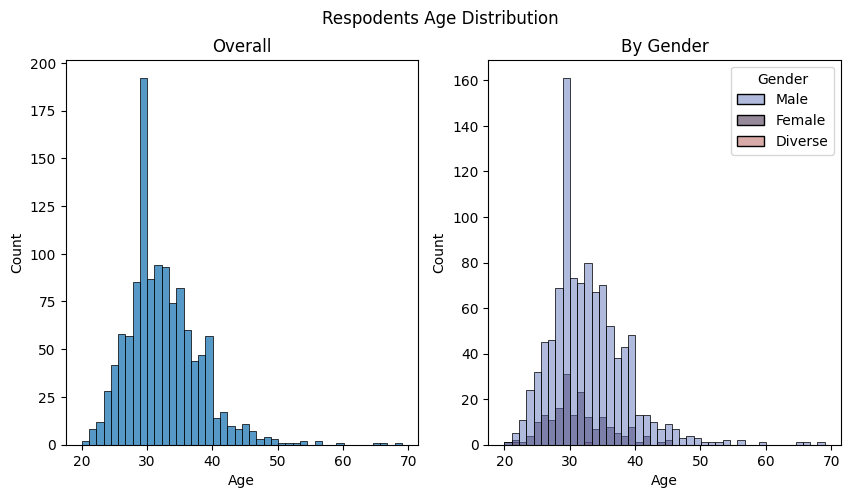

In [24]:
fig, axes = plt.subplots(1, 2, figsize=(10,5))
fig.suptitle('Respodents Age Distribution')
sns.histplot(data=df, x=df.Age, ax=axes[0], palette='twilight').set_title('Overall')
sns.histplot(data=df, x=df.Age, hue=df.Gender, ax=axes[1], palette='twilight').set_title('By Gender')
plt.show()

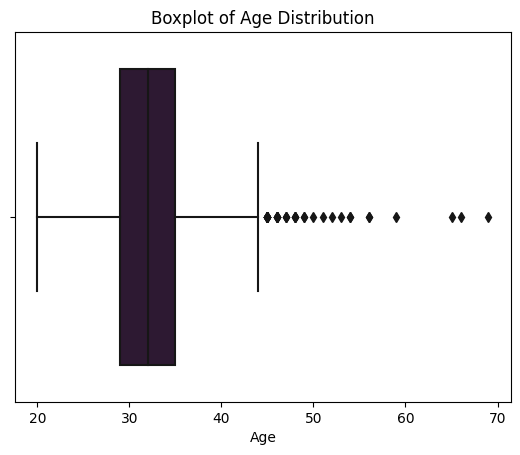

In [25]:
plt.figure()
sns.boxplot(x=df.Age, palette='twilight').set_title('Boxplot of Age Distribution')
plt.show()

In [26]:
df.Gender.value_counts()

Gender
Male       1035
Female      190
Diverse       2
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x166ef911990>,
 [Text(1.057897855891565, -0.5664381047387523, 'Male'),
  Text(-1.1428986502311518, 0.6195019574624537, 'Female'),
  Text(-1.2999829548632744, 0.0066571063496287716, 'Diverse')],
 [Text(0.617107082603413, -0.33042222776427216, '84.4%'),
  Text(-0.7033222462960933, 0.38123197382304846, '15.5%'),
  Text(-0.7999895106850919, 0.004096680830540782, '0.2%')])

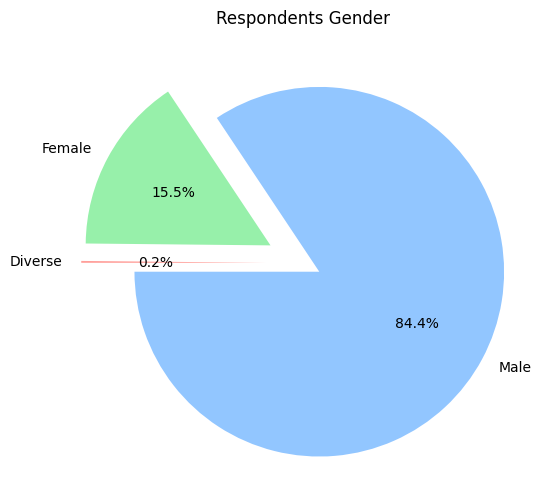

In [27]:
plt.figure(figsize=(12,6))
plt.style.use('seaborn-v0_8-pastel')
plt.title('Respondents Gender')
plt.pie(df.Gender.value_counts().values, labels=df.Gender.value_counts().index, autopct='%1.1f%%', startangle=180, explode=[0.1,0.2,0.2])

In [28]:
df.City.unique()

array(['Munich', 'Berlin', 'Hamburg', 'Wolfsburg', 'Stuttgart',
       'Schleswig-Holstein', 'London', 'Konstanz area', 'Frankfurt',
       'Cologne', 'Kempten', 'Münster', 'Erlangen', 'Vienna', 'Moldova',
       'Rosenheim', 'Mannheim ', 'Boeblingen', 'Düsseldorf', 'Ingolstadt',
       'Nürnberg', 'Ansbach', 'Leipzig', 'Mannheim', 'Tuttlingen', 'Bonn',
       'Moscow', 'Koblenz', 'Warsaw', 'Heidelberg', 'Karlsruhe', 'Köln',
       'Aachen', 'Karlsruhe ', 'Samara', 'Riga, Latvia', 'Dusseldorf',
       'Zurich', 'Helsinki', 'Würzburg', 'Kiev', 'Den Haag', 'Amsterdam',
       'Cracovia', 'Tallinn', 'Prague', 'Utrecht', 'Stockholm',
       'Braunschweig ', 'Dresden', 'Kyiv', 'Stuttgart ', 'Malta',
       'Lübeck', 'Nuremberg ', 'Bodensee', 'Milan', 'Salzburg', 'Rome',
       'Wroclaw', 'Cupertino', 'Paris', 'Dublin ', 'Paderborn',
       'Konstanz', 'Ulm', 'Düsseldorf ', 'Barcelona', 'Bölingen',
       'Tampere (Finland)', 'Hannover', 'Bucharest', 'Siegen', 'Minsk',
       'Nuremberg', 'M

In [29]:
df.loc[df[df.City=='Konstanz area'].index, 'City'] = 'Konstanz'
df.loc[df[(df.City=='Düsseldorf ') | (df.City=='Dusseldurf') | (df.City=='Duesseldorf')].index, 'City'] = 'Düsseldorf'
df.loc[df[df.City=='Heidelberg '].index, 'City'] = 'Heidelberg'
df.loc[df[df.City=='Ingolstadt '].index, 'City'] = 'Ingolstadt'
df.loc[df[df.City=='Milano'].index, 'City'] = 'Milan'
df.loc[df[df.City=='warsaw'].index, 'City'] = 'Warsaw'
df.loc[df[df.City=='Stuttgart '].index, 'City'] = 'Stuttgart'

In [30]:
top_10_cities = df.City.value_counts().nlargest(10)
top_10_cities

City
Berlin        671
Munich        235
Frankfurt      44
Hamburg        39
Stuttgart      33
Cologne        20
Düsseldorf     11
Amsterdam       9
Karlsruhe       6
Prague          6
Name: count, dtype: int64

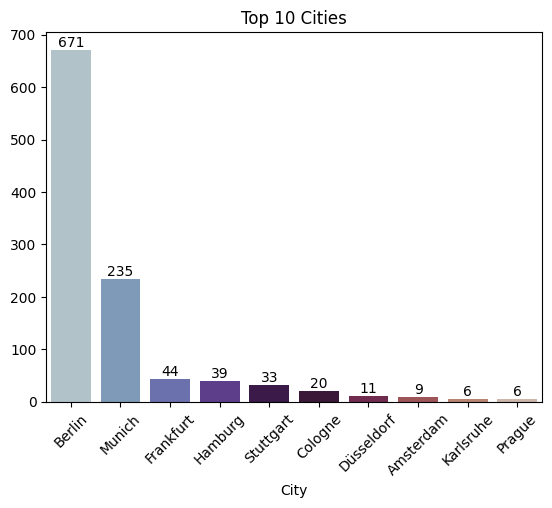

In [31]:
plt.figure()
ax = sns.barplot(x=top_10_cities.index, y=top_10_cities.values, palette='twilight')
ax.bar_label(ax.containers[0])
ax.set_title('Top 10 Cities')
plt.xlabel('City')
plt.xticks(rotation=45)
plt.show()

In [32]:
df['Position '].unique()

array(['Software Engineer', 'Backend Developer', 'Frontend Developer',
       'DevOps', 'Data Engineer', 'Designer (UI/UX)', 'Product Manager',
       'Mobile Developer', 'Software Architect', 'Team Lead',
       'Test manager', 'QA Engineer', 'Data Scientist',
       'Hardware Engineer', 'Engineering Manager', 'Analytics engineer',
       'Localization producer', 'Reporting Engineer', 'Account Managet',
       'agile master ', 'ML Engineer', 'Solution Architect',
       'BI Consultant', 'Fullstack Developer', nan, 'Cloud Architect',
       'System Administrator', 'Project Manager', 'Network Engineer ',
       'VP Engineering', 'Agile Coach', 'Data Science Manager',
       'Scrum Master', 'Firmware Engineer', 'Solutions Architect',
       'Data Center Manager', 'C/C++/Java developer', 'DevOps Manager',
       'Tech Lead', 'Network Administrator', 'Security Manager',
       'Consultant Data Analytics', 'BI IT Consultant',
       'Graphic Designer', 'iOS Developer', 'Banker', 'Cloud Engi

In [33]:
top_positions = df['Position '].value_counts().nlargest(10)
top_positions

Position 
Software Engineer     380
Backend Developer     173
Data Scientist        108
Frontend Developer     89
QA Engineer            71
DevOps                 57
Mobile Developer       53
ML Engineer            42
Product Manager        35
Data Engineer          25
Name: count, dtype: int64

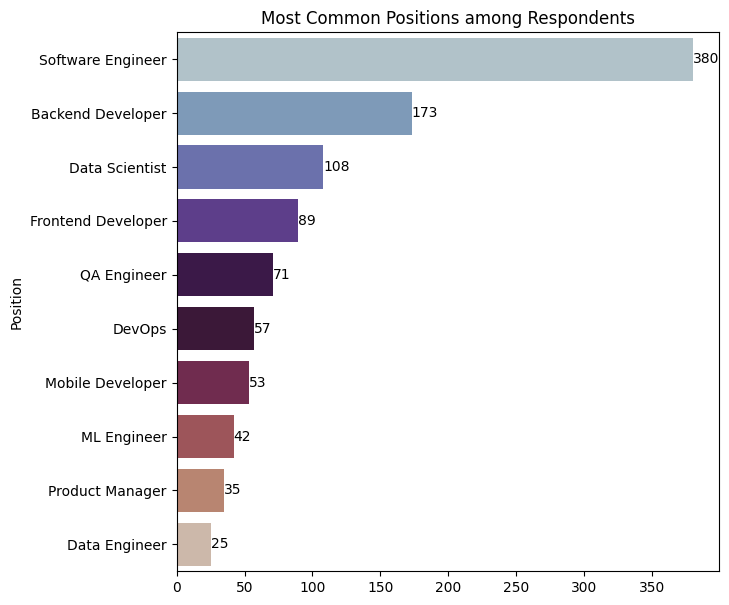

In [34]:
plt.figure(figsize=(7,7))
ax = sns.barplot(x=top_positions.values, y=top_positions.index, palette='twilight')
ax.bar_label(ax.containers[0])
ax.set_title('Most Common Positions among Respondents')
plt.ylabel('Position')
plt.show()

In [35]:
df.Experience_Y.unique()

array(['5', '7', '12', '4', '17', '6', '8', '15', '2', '25', nan, '14',
       '11', '18', '13', '30', '10', '3', '40', '26', '23', '9', '19',
       '20', '5.5', '22', '16', '0.8', '1', '1.5', '6.5', '21', '7.5',
       '2.5', '28', '29', '1,5', '24', '0', '4.5', '27',
       '1 (as QA Engineer) / 11 in total', '2,5', '15, thereof 8 as CTO',
       '31', '6 (not as a data scientist, but as a lab scientist)', '383',
       '3.5', 'less than year'], dtype=object)

In [36]:
df.loc[df[df.Experience_Y =='1 (as QA Engineer) / 11 in total'].index, 'Experience_Y'] = 11
df.loc[df[df.Experience_Y =='15, thereof 8 as CTO'].index, 'Experience_Y'] = 15
df.loc[df[df.Experience_Y =='6 (not as a data scientist, but as a lab scientist)'].index, 'Experience_Y'] = 15
df.loc[df[df.Experience_Y =='383'].index, 'Experience_Y'] = None
df.loc[df[df.Experience_Y =='less than year'].index, 'Experience_Y'] = 0
df.loc[df[df.Experience_Y =='2,5'].index, 'Experience_Y'] = 2.5
df.loc[df[df.Experience_Y =='1,5'].index, 'Experience_Y'] = 1.5

In [37]:
df.Experience_Y.unique()

array(['5', '7', '12', '4', '17', '6', '8', '15', '2', '25', nan, '14',
       '11', '18', '13', '30', '10', '3', '40', '26', '23', '9', '19',
       '20', '5.5', '22', '16', '0.8', '1', '1.5', '6.5', '21', '7.5',
       '2.5', '28', '29', 1.5, '24', '0', '4.5', '27', 11, 2.5, 15, '31',
       None, '3.5', 0], dtype=object)

In [38]:
df.Experience_Y.describe()

count     1220
unique      46
top         10
freq       138
Name: Experience_Y, dtype: object

In [39]:
df.Experience_Y = pd.to_numeric(df.Experience_Y).copy()

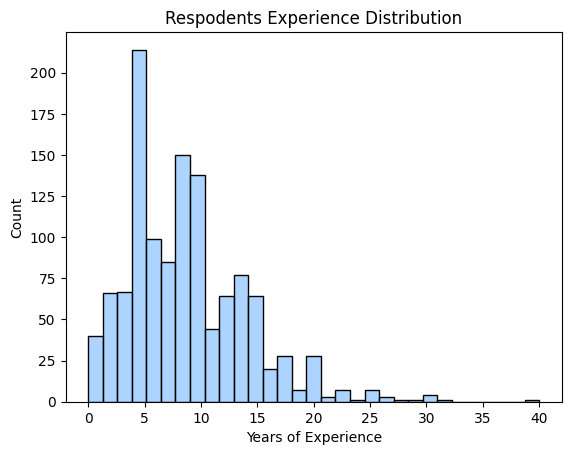

In [40]:
plt.figure()
sns.histplot(data=df, x=df.Experience_Y).set_title('Respodents Experience Distribution')
plt.xlabel('Years of Experience')
plt.show()

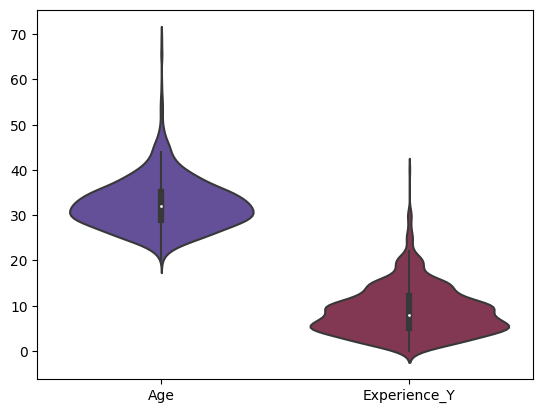

In [41]:
plt.figure()
sns.violinplot(data=df[['Age', 'Experience_Y']], palette='twilight')
plt.show()

In [42]:
df.Seniority.unique()

array(['Senior', 'Lead', 'Junior', 'Middle', 'Head', nan, 'No level',
       'VP', 'Manager', 'Work Center Manager', 'CTO', 'No level ',
       'Director', 'Key', 'C-level executive manager', 'Principal',
       'intern', 'Student', 'no idea, there are no ranges in the firm ',
       'C-Level', 'Working Student', 'Entry level', 'Intern', 'student',
       'Self employed'], dtype=object)

In [43]:
df.loc[df[df.Seniority =='No level'].index, 'Seniority'] = None
df.loc[df[df.Seniority =='No level '].index, 'Seniority'] = None
df.loc[df[df.Seniority =='Key'].index, 'Seniority'] = None
df.loc[df[df.Seniority =='Self employed'].index, 'Seniority'] = None
df.loc[df[df.Seniority =='C-level executive manager'].index, 'Seniority'] = 'C-Level'
df.loc[df[df.Seniority =='no idea, there are no ranges in the firm '].index, 'Seniority'] = None
df.loc[df[df.Seniority =='Work Center Manager'].index, 'Seniority'] = 'Manager'
df.loc[df[df.Seniority =='intern'].index, 'Seniority'] = 'Intern'
df.loc[df[df.Seniority =='Working Student'].index, 'Seniority'] = 'Student'
df.loc[df[df.Seniority =='student'].index, 'Seniority'] = 'Student'

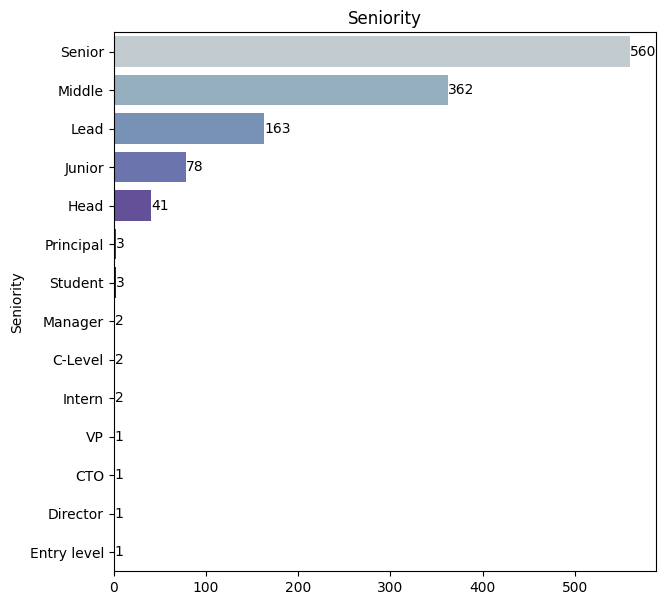

In [44]:
plt.figure(figsize=(7,7))
ax = sns.barplot(x=df.Seniority.value_counts().values, y=df.Seniority.value_counts().index, palette='twilight')
ax.bar_label(ax.containers[0])
ax.set_title('Seniority')
plt.ylabel('Seniority')
plt.show()

In [45]:
df.Bruto_Salary = df.Bruto_Salary.astype(int).copy()

In [46]:
np.max(df.Bruto_Salary)

500000000

In [47]:
df.Bruto_Salary.sort_values(ascending=False)

853     500000000
778        850000
576        300000
630        250000
804        240000
          ...    
770         11000
366         10164
982         10001
883         10001
473   -2147483648
Name: Bruto_Salary, Length: 1237, dtype: int32

In [48]:
df[df.Bruto_Salary==99999999999]

,Age,Gender,City,Position,Experience_Y,Seniority,Primary_Technology,Secondary_Technologies,Bruto_Salary,Bonus,Bruto_Salary_Last_Year,Bonus_Last_Year,Vacation,Employment_Status,Contract_Duration,Language,Company_Size,Company_Type,Lost_Job


In [49]:
df[df.Bruto_Salary==500000000]

,Age,Gender,City,Position,Experience_Y,Seniority,Primary_Technology,Secondary_Technologies,Bruto_Salary,Bonus,Bruto_Salary_Last_Year,Bonus_Last_Year,Vacation,Employment_Status,Contract_Duration,Language,Company_Size,Company_Type,Lost_Job
853,29.0,Female,Cologne,ML Engineer,1.0,Middle,julia,NaN,500000000,5000000000,500000000.0,50000000,99,Full-time employee,Unlimited contract,English,up to 10,Startup,No


In [50]:
df[df.Bruto_Salary==850000]

,Age,Gender,City,Position,Experience_Y,Seniority,Primary_Technology,Secondary_Technologies,Bruto_Salary,Bonus,Bruto_Salary_Last_Year,Bonus_Last_Year,Vacation,Employment_Status,Contract_Duration,Language,Company_Size,Company_Type,Lost_Job
778,42.0,Male,Berlin,Frontend Developer,18.0,Senior,React JS,Javascript / Typescript,850000,95000,75000.0,82000,35,Full-time employee,Unlimited contract,English,101-1000,Product,Yes


In [51]:
df.loc[df[df.Bruto_Salary ==850000].index, 'Bruto_Salary'] = 85000 

In [52]:
df = df.drop(df[df.Bruto_Salary==99999999999].index).copy()
df = df.drop(df[df.Bruto_Salary==500000000].index).copy()

In [228]:
df.Bruto_Salary.unique()

array([      80000,      120000,       54000,       62000,       76000,
             57000,       65000,       56000,       95000,       52500,
            100000,       90000,       70000,       75000,       60350,
             78000,       60000,      103000,       69000,       47400,
             67000,       85000,       45000,       63000,      150000,
             72000,      105000,       88000,       74000,       77000,
             68000,       70500,       73500,       83000,      110000,
             93000,       55000,       53000,       70200,       50000,
             68500,       61000,       73000,       81000,       58000,
             79000,       49000,       44000,       48000,       66000,
             51000,       77500,       71060,       28000,       82000,
             70800,       89200,      115000,      140000,       42000,
             96000,       64000,       61500,       55200,       67200,
             92500,       99000,       61200,       32000,      

# Boxplot of Salary Distribution NEED TO CHECK ON THIS

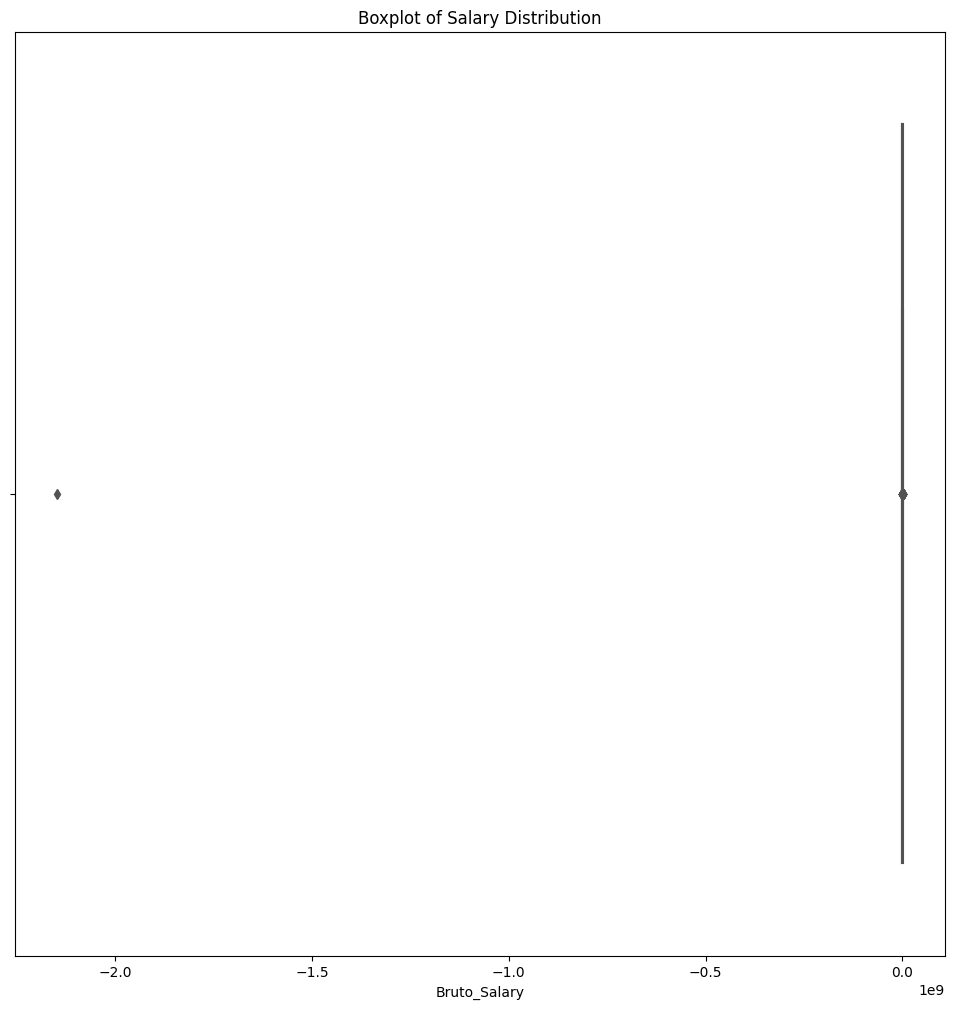

In [230]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure()
sns.boxplot(x=df.Bruto_Salary, palette='plasma').set_title('Boxplot of Salary Distribution')
plt.show()

In [61]:
np.mean(df.Bruto_Salary)

-1666452.504854369

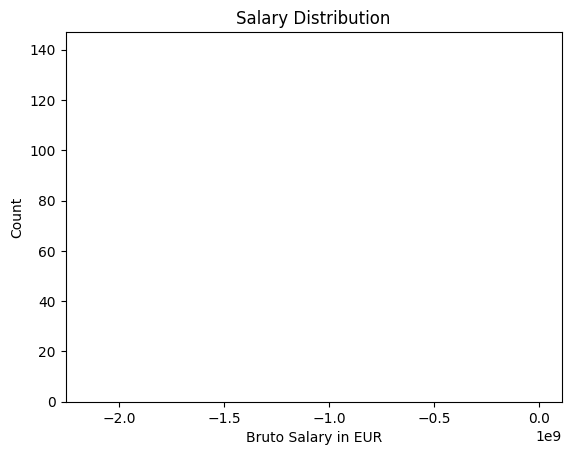

In [57]:
plt.figure()
sns.histplot(data=df, x=df.Bruto_Salary).set_title('Salary Distribution')
plt.xlabel('Bruto Salary in EUR')
plt.show()

In [148]:
df.Bonus.unique()

array(['5000', nan, '120000', '101', '40000', '9400', '2000', '80000',
       '4000', '10000', '1000', '7000', '12000', '1500', '35200', '15000',
       '8000', '72000', '30000', '75000', '73000', '3000', '5800',
       '56000', '6300', '6000', '20000', '62000', '22000', '7500',
       '67000', '7750', '8500', '70000', '17800', '25000', '26000',
       '10300', '6900', '95000', '4700', '18000', '140000', '22500',
       '112000', '7300', '77000', '17000', '32000', '12150', '60000',
       '200000', '3500', '0', '500', '63500', '20240', '81200', '11000',
       '6500', '46000', '400', '122.13', '5600', '4500', '5400', '14500',
       '43500', '50400', '800', '88000', '28800', '65000', '86000',
       '77400', '12', '74000', '19200', '3520', '96000', '47500', '45600',
       '9000', '55000', '11900', 'bvg only', '150000', '13500', '50000',
       '1600', '5500', '45000', '3400', '38500', '2400', '1150000',
       '4300', '85000', '59000', '100000', '63909', '99000', '70500',
       '4500

In [149]:
df.loc[df[df.Bonus =='0'].index, 'Bonus'] = None
df.loc[df[df.Bonus =='Not sure'].index, 'Bonus'] = None
df.loc[df[df.Bonus =='depends'].index, 'Bonus'] = None
df.loc[df[df.Bonus =='-'].index, 'Bonus'] = None
df.loc[df[df.Bonus =='Na'].index, 'Bonus'] = None
df.loc[df[df.Bonus =='bvg only'].index, 'Bonus'] = None
df.loc[df[df.Bonus =='15000+-'].index, 'Bonus'] = '15000'
df.loc[df[df.Bonus =='60847.32'].index, 'Bonus'] = '60847'
df.loc[df[df.Bonus =='122.13'].index, 'Bonus'] = '122'

In [150]:
df.Bonus.fillna(0, inplace=True)
df.Bonus = df.Bonus.astype(int).copy()

In [151]:
df.Bonus.sort_values().tail()

279     200000
441     200000
745     200000
630     450000
564    1150000
Name: Bonus, dtype: int32

In [152]:
df[df.Bonus==1150000]

,Age,Gender,City,Position,Experience_Y,Seniority,Primary_Technology,Secondary_Technologies,Bruto_Salary,Bonus,Bruto_Salary_Last_Year,Bonus_Last_Year,Vacation,Employment_Status,Contract_Duration,Language,Company_Size,Company_Type,Lost_Job
564,30.0,Male,Berlin,Data Engineer,5.0,Lead,NaN,Python,90000,1150000,75000.0,98000,26,Full-time employee,Unlimited contract,English,1000+,Product,No


In [153]:
df.loc[df[df.Bonus ==1150000].index, 'Bonus'] = 0

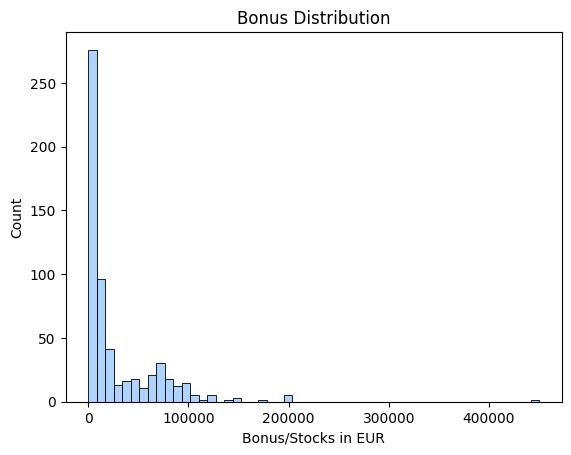

In [154]:
plt.figure()
sns.histplot(data=df[df.Bonus!=0], x=df[df.Bonus!=0].Bonus).set_title('Bonus Distribution')
plt.xlabel('Bonus/Stocks in EUR')
plt.show()

In [155]:
np.mean(df.Bonus)

13289.161003236246

In [156]:
df.Bruto_Salary_Last_Year.unique()

array([ 75000.,  82000., 100000.,     nan,  62000.,  76000.,  65000.,
        55000.,  90000.,  52500.,  80000.,  66000.,  58000.,  92000.,
        69000.,  63000.,  44000.,  78000.,  81000.,  37000.,  72000.,
        96000.,  54000.,  52000.,  60000.,  68000.,  50000.,  56000.,
        70000.,  85000.,  93000.,  42000.,  53000.,  79000.,  62400.,
        73000.,  45000.,  61000.,  72500.,  77000., 110000.,  36000.,
        67000.,  68500.,  67500.,  57000., 115000.,  88000., 132000.,
       105000.,  57600.,  56500.,  48000.,  47000.,  97000.,  98000.,
        53300.,  21800., 108000.,  74000.,  80600., 120000.,  64000.,
        82240.,  43000.,  56400.,  17000.,  46000.,  43200.,  59000.,
        54500.,  78500.,  61500.,  70400.,  20000.,  94000., 125000.,
        14712.,  28800.,  27000.,  89000.,  26000.,  40000.,  86000.,
        16000.,  16560.,  61400.,  41000.,  39000.,  18000.,  30000.,
        84000., 156000.,  69300., 130000., 104000., 118000.,  67100.,
       160000.,  350

In [157]:
df.Bruto_Salary_Last_Year.fillna(0, inplace=True)
df.Bruto_Salary_Last_Year = df.Bruto_Salary_Last_Year.astype(int).copy()

In [158]:
df.Bruto_Salary_Last_Year.sort_values().tail()

837     190000
1223    200000
966     200000
630     230000
658     760000
Name: Bruto_Salary_Last_Year, dtype: int32

In [159]:
df[df.Bruto_Salary_Last_Year==760000]

,Age,Gender,City,Position,Experience_Y,Seniority,Primary_Technology,Secondary_Technologies,Bruto_Salary,Bonus,Bruto_Salary_Last_Year,Bonus_Last_Year,Vacation,Employment_Status,Contract_Duration,Language,Company_Size,Company_Type,Lost_Job
658,31.0,Male,Berlin,Product Manager,5.0,Lead,NaN,NaN,76000,20000,760000,20000,28,Full-time employee,Unlimited contract,English,51-100,Startup,No


In [160]:
df.loc[df[df.Bruto_Salary_Last_Year==760000].index, 'Bruto_Salary_Last_Year'] = 76000

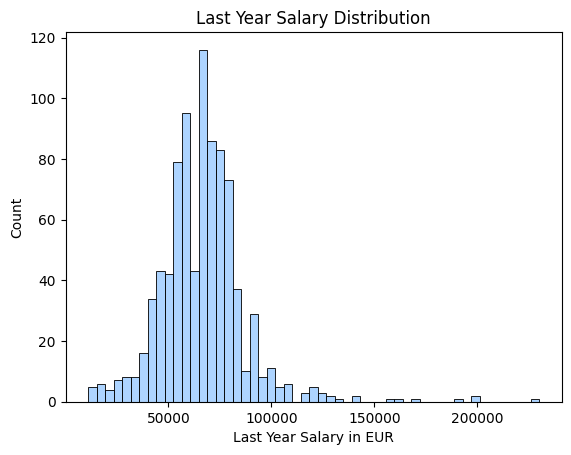

In [161]:
plt.figure()
sns.histplot(data=df[df.Bruto_Salary_Last_Year!=0], x=df[df.Bruto_Salary_Last_Year!=0].Bruto_Salary_Last_Year).set_title('Last Year Salary Distribution')
plt.xlabel('Last Year Salary in EUR')
plt.show()

In [162]:
df.Bonus_Last_Year.unique()

array(['10000', '5000', '100000', nan, '13000', '2000', '500', '75000',
       '7000', '1000', '4000', '3500', '20000', '54000', '15000', '85000',
       '60000', '11000', '2500', '63000', '122000', '50000', '8000',
       '101', '30000', '300', '33000', '6000', '1500', '3000', '65000',
       '6800', '58000', '70000', '8500', '61000', '25000', '77000',
       '5400', '6300', '49000', '68000', '6200', '17000', '52000',
       '200000', '0', '850', '18000', '55000', '1800', '57000', '46000',
       '48000', '45000', '7500', '18800', '67000', '78000', '28800',
       '56000', '74800', '40000', '115000', '16300', '2760', '82000',
       '39000', '100', '4800', '80000', 'learning budget, bvg, gym, food',
       '12000', '92000', '120000', '64000', '5500', '600', '98000',
       '31000', '67200', '59000', '50400', '89000', '800', '300000',
       '2004', '87000', '9000', '84000', '22000', '76000', '6900',
       '66000', '23000', '75009', '35000', '2600', '3900', '8100',
       '86000', '72

In [74]:
df.loc[df[df.Bonus_Last_Year =='learning budget, bvg, gym, food'].index, 'Bonus_Last_Year'] = 0
df.loc[df[df.Bonus_Last_Year =='-'].index, 'Bonus_Last_Year'] = 0

In [231]:
df.Bonus_Last_Year.fillna(0, inplace=True)
df.Bonus_Last_Year = df.Bonus_Last_Year.astype(int).copy()

In [232]:
df.Bonus_Last_Year.sort_values().tail()

83      122000
1186    180000
966     200000
279     200000
630     300000
Name: Bonus_Last_Year, dtype: int32

In [233]:
df[df.Bonus_Last_Year==300000]

,Age,Gender,City,Position,Experience_Y,Seniority,Bruto_Salary,Bonus,Bruto_Salary_Last_Year,Bonus_Last_Year,Vacation,Employment_Status,Company_Type
630,40.0,Male,Cupertino,Software Engineer,20.0,Lead,250000,450000,230000.0,300000,45,Full-time employee,Product


In [234]:
df.drop(df[df.Bonus_Last_Year==300000].index, inplace=True)

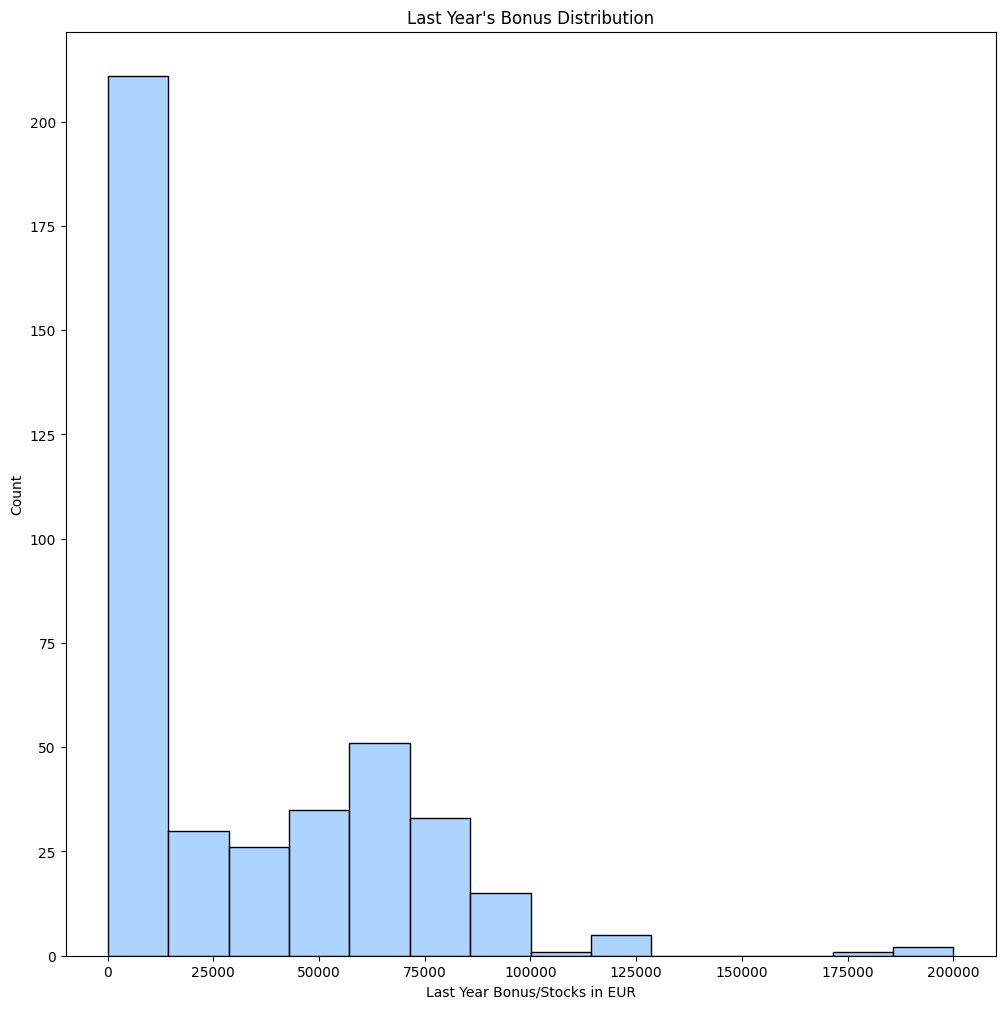

In [235]:
plt.figure()
sns.histplot(data=df[df.Bonus_Last_Year!=0], x=df[df.Bonus_Last_Year!=0].Bonus_Last_Year).set_title("Last Year's Bonus Distribution")
ax.bar_label(ax.containers[0])
plt.xlabel('Last Year Bonus/Stocks in EUR')
plt.show()

# Correlation

In [240]:
columns_of_interest = ['Age', 'Experience_Y', 'Bruto_Salary', 'Bonus', 'Bruto_Salary_Last_Year', 'Bonus_Last_Year']

In [241]:
import pandas as pd

# Create a copy of the DataFrame with only the selected columns
df_sub = df[columns_of_interest].copy()

# Convert non-numeric values to NaN
df_sub = df_sub.apply(pd.to_numeric, errors='coerce')

# Compute the correlation matrix
corr = df_sub.dropna().corr()
print(corr)


                             Age  Experience_Y  Bruto_Salary     Bonus  \
Age                     1.000000      0.745980      0.284586  0.046191   
Experience_Y            0.745980      1.000000      0.397778  0.042407   
Bruto_Salary            0.284586      0.397778      1.000000  0.228527   
Bonus                   0.046191      0.042407      0.228527  1.000000   
Bruto_Salary_Last_Year  0.195637      0.245957      0.564112  0.103718   
Bonus_Last_Year         0.101923      0.086793      0.282186  0.528316   

                        Bruto_Salary_Last_Year  Bonus_Last_Year  
Age                                   0.195637         0.101923  
Experience_Y                          0.245957         0.086793  
Bruto_Salary                          0.564112         0.282186  
Bonus                                 0.103718         0.528316  
Bruto_Salary_Last_Year                1.000000         0.165078  
Bonus_Last_Year                       0.165078         1.000000  


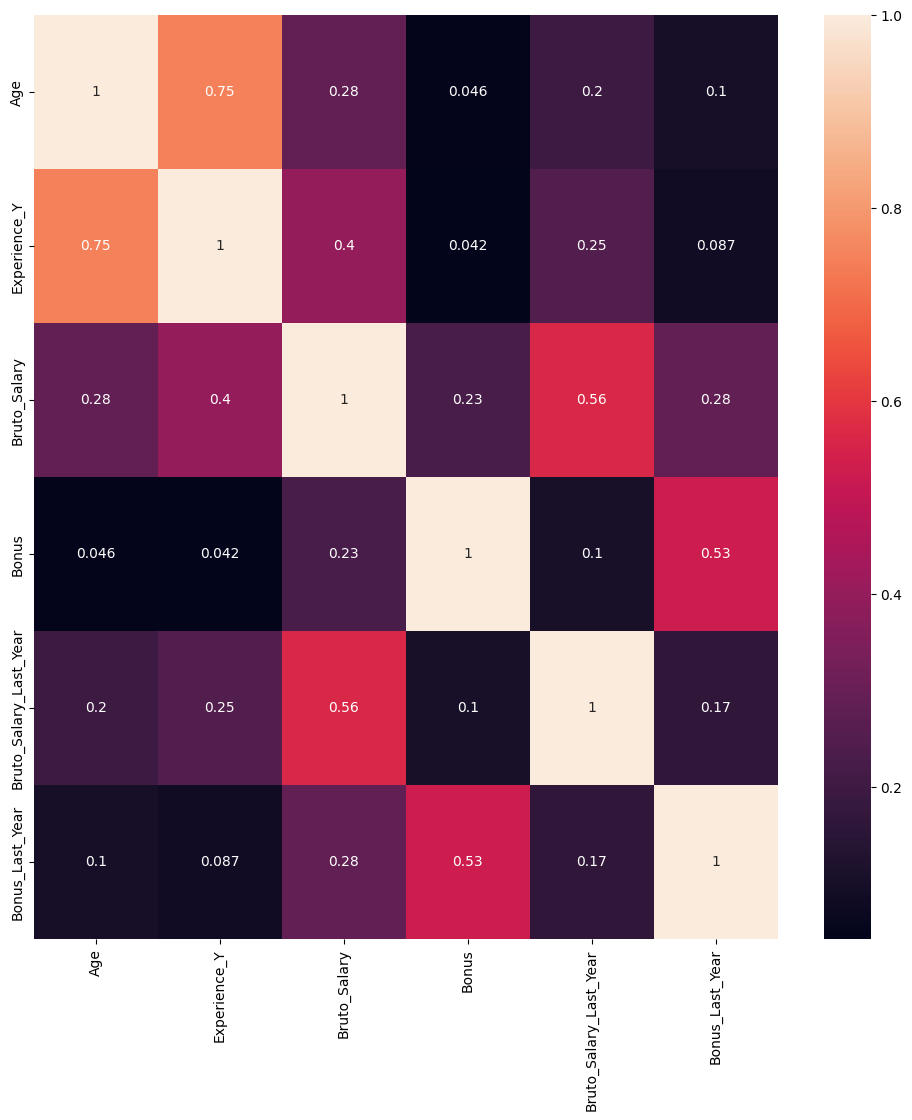

In [242]:
plt.figure()
sns.heatmap(corr, annot=True)
plt.show()

# Looking at the correlation interesting findings are observed:

1. Age is correlated with Years of Experience and slightly with Bonus
2. Years of Experience is correlated with Bonus and Last Year Bonus
3. It is interesting that Salaries are not that correlated with the other variables

# Asking and Answering Questions

1. Q: What are the most paid positions?

In [243]:
top_paid_positions = df.groupby('Position ').Bruto_Salary.mean().nlargest(10)

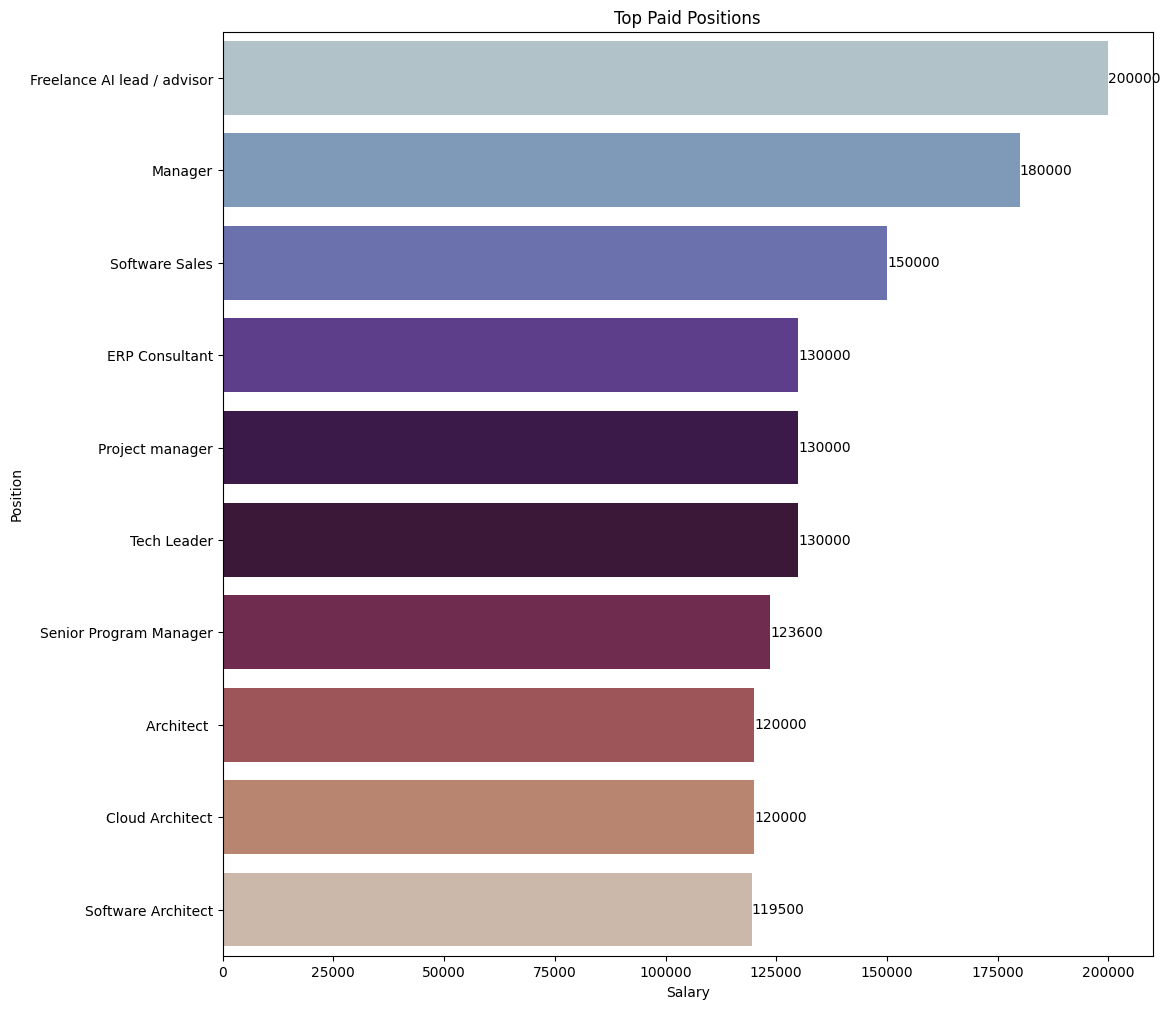

In [244]:
plt.figure()
ax = sns.barplot(x=top_paid_positions.values, y=top_paid_positions.index, palette='twilight')
ax.bar_label(ax.containers[0])
ax.set_title('Top Paid Positions')
plt.ylabel('Position')
plt.xlabel('Salary')
plt.show()

2. Q: What is the average experience per seniority?

In [247]:
average_experience = df.groupby('Seniority').Experience_Y.mean().sort_values()

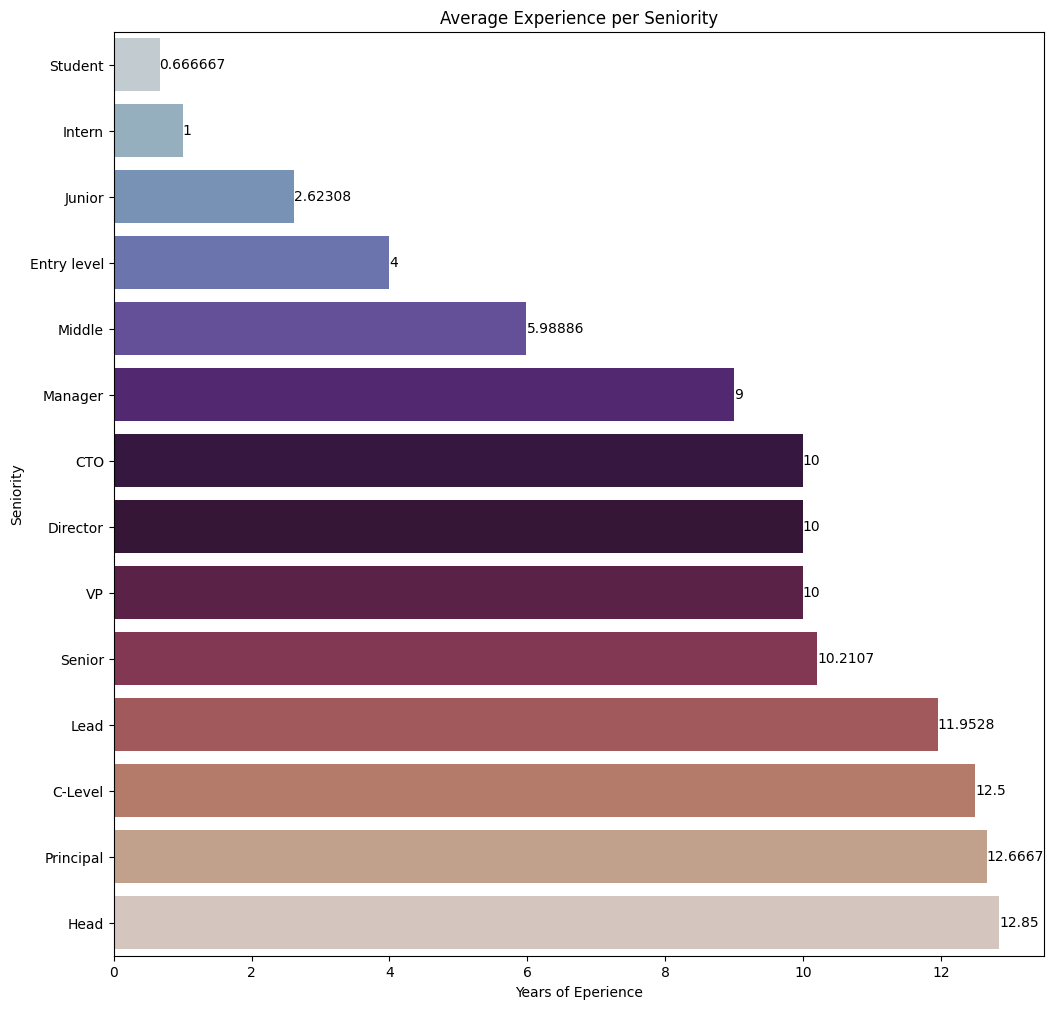

In [246]:
plt.figure()
ax = sns.barplot(x=average_experience.values, y=average_experience.index, palette='twilight')
ax.bar_label(ax.containers[0])
ax.set_title('Average Experience per Seniority')
plt.ylabel('Seniority')
plt.xlabel('Years of Eperience')
plt.show()

# Analysis

In [172]:
X = df.drop(['Position '], axis=1)
Y = df['Bruto_Salary']

In [173]:
X.head()

,Age,Gender,City,Experience_Y,Seniority,Primary_Technology,Secondary_Technologies,Bruto_Salary,Bonus,Bruto_Salary_Last_Year,Bonus_Last_Year,Vacation,Employment_Status,Contract_Duration,Language,Company_Size,Company_Type,Lost_Job
0,26.0,Male,Munich,5.0,Senior,TypeScript,"Kotlin, Javascript / Typescript",80000,5000,75000.0,10000,30,Full-time employee,Unlimited contract,English,51-100,Product,No
1,26.0,Male,Berlin,7.0,Senior,Ruby,NaN,80000,NaN,82000.0,5000,28,Full-time employee,Unlimited contract,English,101-1000,Product,No
2,29.0,Male,Berlin,12.0,Lead,Javascript / Typescript,"Javascript / Typescript, Docker",120000,120000,100000.0,100000,30,Self-employed (freelancer),Temporary contract,English,101-1000,Product,Yes
3,28.0,Male,Berlin,4.0,Junior,Javascript,NaN,54000,NaN,NaN,NaN,24,Full-time employee,Unlimited contract,English,51-100,Startup,No
4,37.0,Male,Berlin,17.0,Senior,C# .NET,".NET, SQL, AWS, Docker",62000,NaN,62000.0,NaN,29,Full-time employee,Unlimited contract,English,101-1000,Product,No


In [174]:
Y.head()

0     80000
1     80000
2    120000
3     54000
4     62000
Name: Bruto_Salary, dtype: int32

In [190]:
#Splitting the data into test data and training data

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

In [215]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# Your categorical features
categorical = ['Age', 'Gender', 'City', 'Seniority', 'Company_Type', 'Employment_Status', 'Experience_Y']

# Assuming you have X_train and X_test DataFrames
X_train = X_train.fillna('NA')
X_test = X_test.fillna('NA')

# Convert categorical features using LabelEncoder
label_encoders = {}  # To store label encoders for each feature

for feature in categorical:
    le = LabelEncoder()
    combined_data = pd.concat([X_train[feature], X_test[feature]])
    le.fit(combined_data)
    
    label_encoders[feature] = le
    
    X_train[feature] = le.transform(X_train[feature])
    X_test[feature] = le.transform(X_test[feature])

# Handle 'NA' values by replacing them with a unique value
X_train_numeric = X_train.apply(pd.to_numeric, errors='coerce')
X_test_numeric = X_test.apply(pd.to_numeric, errors='coerce')

X_train_numeric.fillna(-999, inplace=True)
X_test_numeric.fillna(-999, inplace=True)


In [217]:
# Scale the numeric data using MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_numeric)
X_test_scaled = scaler.transform(X_test_numeric)

# Convert the scaled features back to original categories
for feature in categorical:
    le = label_encoders[feature]
    
    # Round scaled values to the nearest integer before inverse transforming
    X_train_scaled[:, X_train.columns.get_loc(feature)] = np.round(X_train_scaled[:, X_train.columns.get_loc(feature)])
    X_test_scaled[:, X_test.columns.get_loc(feature)] = np.round(X_test_scaled[:, X_test.columns.get_loc(feature)])
    
    X_train_scaled[:, X_train.columns.get_loc(feature)] = le.inverse_transform(X_train_scaled[:, X_train.columns.get_loc(feature)].astype(int))
    X_test_scaled[:, X_test.columns.get_loc(feature)] = le.inverse_transform(X_test_scaled[:, X_test.columns.get_loc(feature)].astype(int))


In [219]:
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train_scaled, Y_train)

# Predict on the test set
Y_prediction = random_forest.predict(X_test_scaled)

# Calculate accuracy on the training set
acc_random_forest = round(random_forest.score(X_train_scaled, Y_train) * 100, 2)
print("Random Forest Training Accuracy:", acc_random_forest)

Random Forest Training Accuracy: 99.88


In [220]:
# Initialize and train the Logistic Regression model
logreg = LogisticRegression()
logreg.fit(X_train_scaled, Y_train)

# Predict on the test set
Y_pred = logreg.predict(X_test_scaled)

# Calculate accuracy on the training set
acc_log = round(logreg.score(X_train_scaled, Y_train) * 100, 2)
print("Logistic Regression Training Accuracy:", acc_log)

Logistic Regression Training Accuracy: 11.68


c:\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [221]:
# Initialize and train the KNN model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, Y_train)

# Predict on the test set
Y_pred = knn.predict(X_test_scaled)

# Calculate accuracy on the training set
acc_knn = round(knn.score(X_train_scaled, Y_train) * 100, 2)
print("KNN Training Accuracy:", acc_knn)


KNN Training Accuracy: 39.08


In [222]:
# Initialize and train the Gaussian Naive Bayes model
gaussian = GaussianNB()
gaussian.fit(X_train_scaled, Y_train)

# Predict on the test set
Y_pred = gaussian.predict(X_test_scaled)

# Calculate accuracy on the training set
acc_gaussian = round(gaussian.score(X_train_scaled, Y_train) * 100, 2)
print("Gaussian Naive Bayes Training Accuracy:", acc_gaussian)

Gaussian Naive Bayes Training Accuracy: 17.69


In [223]:
# Initialize and train the Linear SVM model
linear_svc = LinearSVC()
linear_svc.fit(X_train_scaled, Y_train)

# Predict on the test set
Y_pred = linear_svc.predict(X_test_scaled)

# Calculate accuracy on the training set
acc_linear_svc = round(linear_svc.score(X_train_scaled, Y_train) * 100, 2)
print("Linear SVM Training Accuracy:", acc_linear_svc)

Linear SVM Training Accuracy: 15.38


In [207]:
# Initialize and train the Decision Tree model
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train_scaled, Y_train)

# Predict on the test set
Y_pred = decision_tree.predict(X_test_scaled)

# Calculate accuracy on the training set
acc_decision_tree = round(decision_tree.score(X_train_scaled, Y_train) * 100, 2)
print("Decision Tree Training Accuracy:", acc_decision_tree)

Decision Tree Training Accuracy: 99.88


In [208]:
#Plotting the accuracy of the used algorithms to find the best fit

results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 'Random Forest', 'Naive Bayes', 'Decision Tree'],
    'Score': [acc_linear_svc, acc_knn, acc_log, acc_random_forest, acc_gaussian, acc_decision_tree]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(7)

,Model
Score,
99.88,Random Forest
99.88,Decision Tree
39.08,KNN
17.69,Naive Bayes
15.38,Support Vector Machines
11.68,Logistic Regression


In [209]:
#Finding significance of each feature in t5he best fit model

importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(15)

,importance
feature,
Bruto_Salary,0.388
Bruto_Salary_Last_Year,0.145
Bonus,0.116
Vacation,0.108
Bonus_Last_Year,0.083
City,0.037
Seniority,0.026
Company_Type,0.024
Experience_Y,0.021


<Axes: xlabel='feature'>

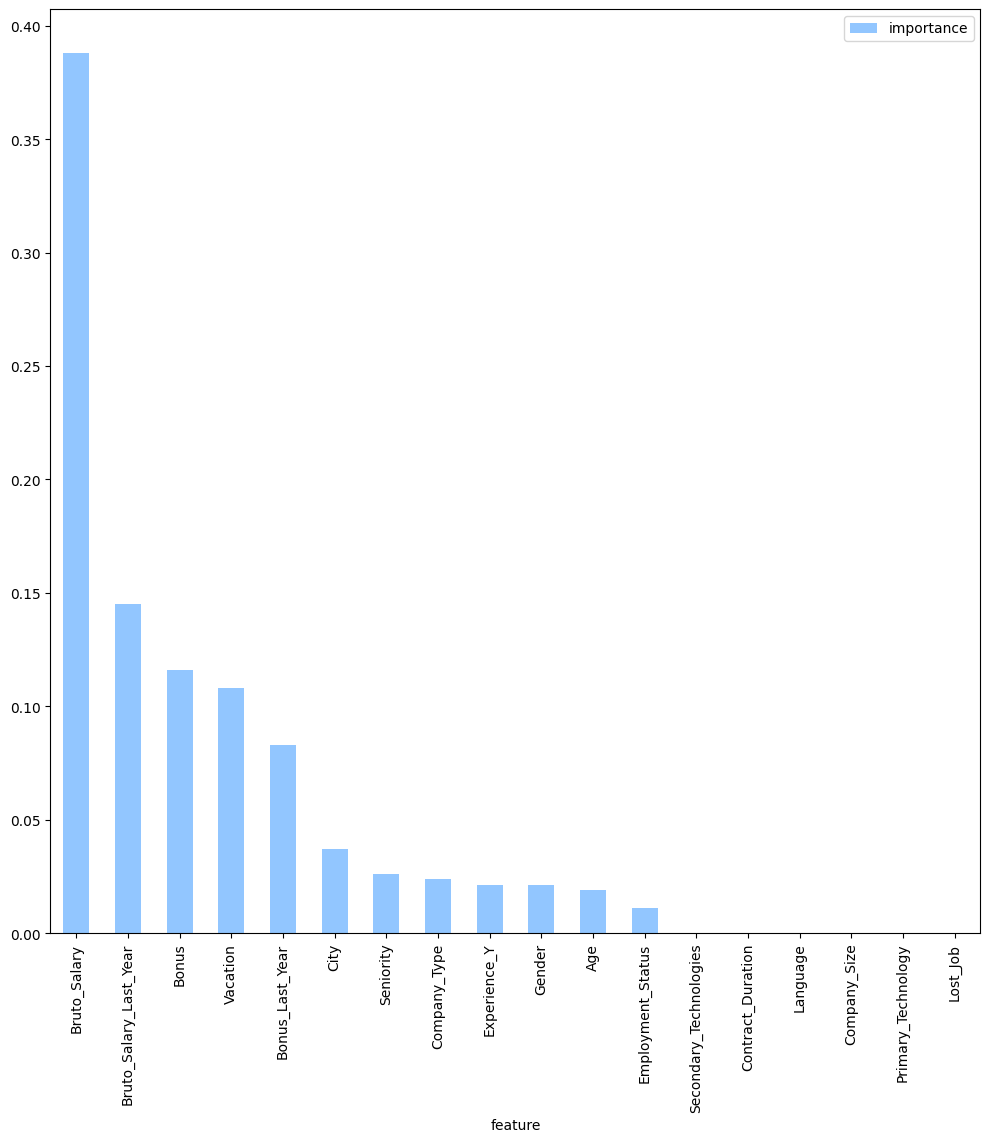

In [210]:
#Plotting the significance of each feautre

importances.plot.bar()

In [211]:
#Since they hardly have any significance, can drop these columns to avoid overfitting

df  = df.drop("Secondary_Technologies", axis=1)
df  = df.drop("Contract_Duration", axis=1)
df  = df.drop("Language", axis=1)
df  = df.drop("Company_Size", axis=1)
df  = df.drop("Primary_Technology", axis=1)
df  = df.drop("Lost_Job", axis=1)